[^Comment]:  ![Boxoffice](images/box%20office%20pic.png)

<img src="images/box%20office%20pic.png" alt="Boxoffice" style="width:500px;"/>

# Overview



This project analyzes the 'best', most successful, movies at the boxoffice within recent years. Descriptive analysis of various movie aspects such as genre, director, actor, etc and outcome data shows that franchise movies, comedies and dramas, and directors such as Gerald Thomas, Steven Spilberg, and Steven Quale have lead to the success and popularity of recent boxoffice. Microsoft may use this analysis to aid in their new movie studio's decisions on what movies to create. 

# Business Problem



[^Comment]: ![images/Friends-eating-popcorn-at-the-movie-theatre-485816418_3869x2579.jpeg.crdownload)

<img src="images/Friends-eating-popcorn-at-the-movie-theatre-485816418_3869x2579.jpeg.crdownload" alt="Boxoffice" style="width:500px;"/>

The Microsoft Corporation has decided to join the lucrative market of movie making. Patterns regarding to modern boxoffice hits are depicted in order to aid the Microsoft corporation in creating a successful movie studio and films. 

# Data Understanding

[^Comment]: ![images/best-movies-1624472751.jpg)

<img src="images/best-movies-1624472751.jpg" alt="Boxoffice" style="width:500px;"/>

IMBD (Internet Movie Database)is an online database of information related to films and other entertainment. Box Office Mojo is an American website that tracks box-office revenue in a systematic, algorithmic way. Rotten Tomatoes is an American review-aggregation website for film and television and The Numbers is a film industry data website that tracks box office revenue in a systematic, algorithmic way. The data files provide information about domestic gross, foreign gross, year of release, directors, movie ratings, writers, and more. 

In [485]:
import pandas as pd
import numpy as np
import sqlite3

In [486]:
bom = pd.read_csv('Data/bom.movie_gross.csv.gz')
rt_movie = pd.read_csv('Data/rt.movie_info.tsv.gz', sep = '\t')
rt_reviews = pd.read_csv('Data/rt.reviews.tsv.gz', sep = '\t', encoding = 'windows-1252', index_col=0)
tn_movie = pd.read_csv('Data/tn.movie_budgets.csv.gz', index_col=0)


In [487]:
conn = sqlite3.connect('Data/im.db')
cur = conn.cursor()

# Movie Aspects Data

The 5 movie datsets depict many aspects of movie making. Box Office Mojo displays the studio, the domestic gross, the foreign gross, and the release year of the movie. Rotten tomatoes has two data files, one that displays the synopsis, rating, genre, runtime, critic, review among other aspects. The Numbers data file notiable depicts the production budget and IMBD's data file contains writers, what the movie is known for and movie basics. 

In [488]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [489]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [490]:
rt_reviews.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [491]:
tn_movie.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [492]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [524]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [526]:
q5 = """
SELECT
    r.averagerating,
    b.primary_title,
    b.genres
FROM
    movie_ratings r
    JOIN movie_basics b
        ON r.movie_id = b.movie_id
GROUP BY b.genres 
ORDER BY r.averagerating DESC
;
"""
q5_result = pd.read_sql(q5, conn)
q5_result.head(15)

,averagerating,primary_title,genres
0,9.7,Foosballers,"Comedy,Documentary,Sport"
1,9.4,Some Called Them Baby Killers... We Call Them ...,"Documentary,Drama,War"
2,9.4,Lost Conquest,"Comedy,Documentary,Fantasy"
3,9.3,The Boys Are Back - Bandstand: The Broadway Mu...,Musical
4,9.3,Sunakali,"Documentary,Family,Musical"
5,9.3,Silent Drum,"Documentary,Drama,Music"
6,9.2,The Long Count Teaser,"History,Sport"
7,9.2,I Ride,"Documentary,Family,Music"
8,9.2,Mzungu (n.) White-Wanderer,"Adventure,Documentary,Drama"
9,9.2,Black Beauty Breed,"Action,Documentary,Family"


In [528]:
conn.close()

# Data Preparation

I combined a few datasets together in order to more eaily understand and analyze the information. Box Office Mojo and The Numbers datasets both included domestic and worldwide gross revenue columns. I changed the names of the 'foreign gross' column to 'worldwide gross' and the 'title' column to 'movie' in order to merge the sets. I alo changed the type in the gross revenue columns of the Box Office Mojo Dataset to object in order to facilitate the merge. The two Rotten Tomato datasets were merged on ID. 

In [493]:
bom.rename(columns={"foreign_gross": "worldwide_gross"},inplace=True)
bom.rename(columns={"title": "movie"},inplace=True)

In [494]:
movies_data1 = pd.merge(bom, tn_movie, on = 'movie')
movies_data2 = pd.merge(rt_reviews, rt_movie, left_index=True, right_index=True)


In [495]:
movies_data1.head()

,movie,studio,domestic_gross_x,worldwide_gross_x,year,release_date,production_budget,domestic_gross_y,worldwide_gross_y
0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [496]:
movies_data1['domestic_gross_x'] = pd.to_numeric(movies_data1['domestic_gross_x'],errors = 'coerce')
movies_data1['domestic_gross_x']

0       415000000.0
1       292600000.0
2       238700000.0
3       300500000.0
4       312400000.0
           ...     
1242      4300000.0
1243      3700000.0
1244       491000.0
1245      1200000.0
1246      1200000.0
Name: domestic_gross_x, Length: 1247, dtype: float64

In [497]:
q1_data = movies_data1[['domestic_gross_x', 'movie']]

In [498]:
movies_data1['domestic_gross_y'] = movies_data1['domestic_gross_y'].astype(str)

In [499]:
movies_data2.head()

,review,rating_x,fresh,critic,top_critic,publisher,date,id,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN


# Data Cleaning

I dropped columns that were irrelavent for easier understanding and analyzing of the data that will aid me in answering the business question such as currency, dvd_date, etc. I also dropped columns that had too many null data, such as the worldwide gross column from the Box Office Mojo data and the Studio Column from the Rotten Tomatoes data. Removing these columns will allow for more succinct datasets and consise analyzations.

In [500]:
missing_worldwide_gross_sample = movies_data1[movies_data1["worldwide_gross_x"].isna()].sample(5, random_state=1)
missing_worldwide_gross_sample.head()

,movie,studio,domestic_gross_x,worldwide_gross_x,year,release_date,production_budget,domestic_gross_y,worldwide_gross_y
491,Compliance,Magn.,319000.0,NaN,2012,"Aug 17, 2012","$270,000","$319,285","$830,700"
495,The First Time,Gold.,22800.0,NaN,2012,"Oct 19, 2012","$2,000,000","$17,061","$17,061"
1004,Whiskey Tango Foxtrot,Par.,23100000.0,NaN,2016,"Mar 4, 2016","$35,000,000","$23,083,334","$25,350,747"
754,Dom Hemingway,FoxS,524000.0,NaN,2014,"Apr 2, 2014","$7,000,000","$523,511","$1,857,458"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,"Dec 7, 2018","$13,000,000","$3,703,182","$9,633,111"


In [501]:
movies_data1.dropna(subset=["worldwide_gross_x"], inplace=True)

In [502]:
studio_sample = movies_data1[movies_data1["studio"].isna()]
studio_sample

,movie,studio,domestic_gross_x,worldwide_gross_x,year,release_date,production_budget,domestic_gross_y,worldwide_gross_y
322,Fireflies in the Garden,NaN,70600.0,3300000,2011,"Oct 14, 2011","$8,000,000","$36,884","$3,587,191"


In [503]:
movies_data2.dropna(subset=["studio"], inplace=True)

# Data Analysis

In [504]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


%matplotlib inline

## Top Movies Domestic Gross

The top movies listed from Box Office Mojo are Black Panther, Avengers: Infinity War, Jurassic World, Incredibles 2, and Rogue One: A Star Wars Story.

In [505]:
top_movies=movies_data1.nlargest(n=5, columns='domestic_gross_x')
top_movies

,movie,studio,domestic_gross_x,worldwide_gross_x,year,release_date,production_budget,domestic_gross_y,worldwide_gross_y
1155,Black Panther,BV,700100000.0,646900000,2018,"Feb 16, 2018","$200,000,000","$700,059,566","$1,348,258,224"
1154,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
764,Jurassic World,Uni.,652300000.0,"1,019.4",2015,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
1157,Incredibles 2,BV,608600000.0,634200000,2018,"Jun 15, 2018","$200,000,000","$608,581,744","$1,242,520,711"
911,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,"Dec 16, 2016","$200,000,000","$532,177,324","$1,049,102,856"


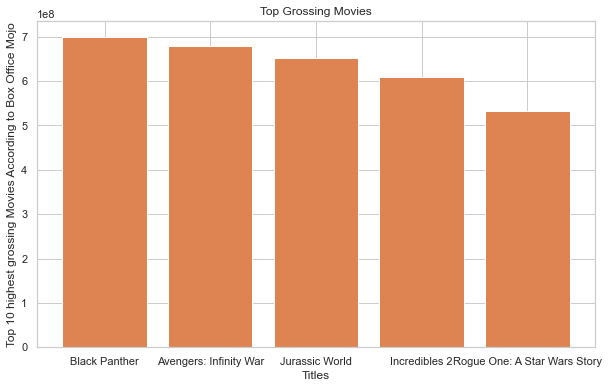

In [506]:

domestic = top_movies['domestic_gross_x']

title = top_movies['movie']
#world = movies_data1['worldwide_gross_y'].nlargest(n=10)

sns.color_palette("Accent")

sns.set_style("whitegrid")

# Figure Size
fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal Bar Plot
plt.bar(title, domestic)
ax.set_title('Highest Grossing movies')
ax.bar(title, domestic);
# Give a title to the bar graph and label the axes
ax.set_title("Top Grossing Movies")
ax.set_xlabel("Titles")
ax.set_ylabel("Top 10 highest grossing Movies According to Box Office Mojo")


# Show Plot
plt.show()

## Most Popular Movie Genres

The majority of movies are either Drama, Comedy, or Comedy/Drama according to Rotten Tomatoes.

In [509]:
movies_data2['genre'].value_counts().sort_values().tail()

Drama|Romance                  687
Action and Adventure|Drama     729
Comedy|Drama                   892
Comedy                        1273
Drama                         1896
Name: genre, dtype: int64

<AxesSubplot:title={'center':'Most Popular Genres'}, ylabel='Genres'>

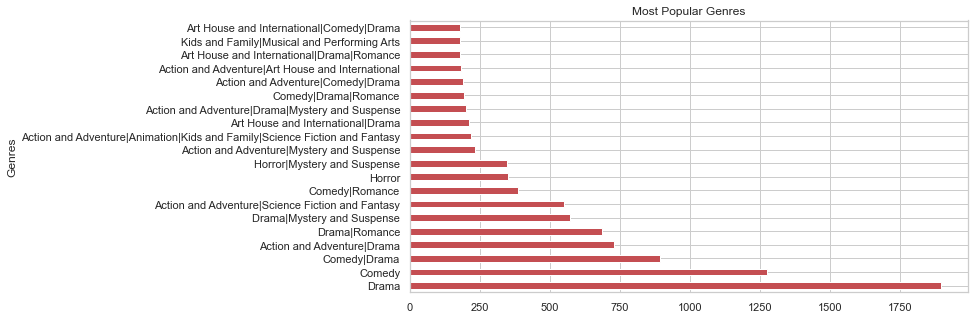

In [520]:
movies_data2['genre'].value_counts()[:20].plot(title = 'Most Popular Genres', xlabel = 'Genres', ylabel = 'Genres', figsize=(10, 5), kind='barh', color = 'r')

    

In [ ]:
movies_data1['genre'].value_counts()[:20].plot(title = 'Most Popular Genres', xlabel = 'Genres', ylabel = 'Genres', figsize=(10, 5), kind='barh', color = 'r')

    

## Directors of Most Movies

The directors with the most movies are Gerald Thomas, Steven Spilberg, and Steven Quale.

In [479]:
movies_data2['director'].value_counts().sort_values().tail()

Howard Hawks          306
Andrzej Bartkowiak    326
Steven Quale          338
Steven Spielberg      356
Gerald Thomas         485
Name: director, dtype: int64

<AxesSubplot:title={'center':'Directors with Most Movies'}, ylabel='Directors'>

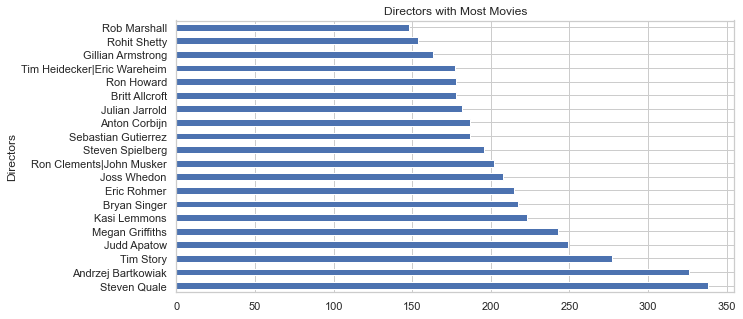

In [521]:
movies_data2['director'].value_counts()[:20].plot(title = 'Directors with Most Movies', xlabel = 'Directors', ylabel = 'Genres', figsize=(10, 5), kind='barh', color = 'b')


# Conclusions




This analysis leads to three recommendations for Microsoft's new movie studio and their future productions:

- According to the Box Office Mojo data the top domestic grossing movies are Black Panther, Avengers: Infinity War, Jurassic World, Incredibles 2, and Rogue One: A Star Wars Story. **Therefore I would recommend the Microsoft company invest or manufacture a franchise since franchise movies earn the most at the boxoffice.**

- According to the Rotten Tomatoes webiste, the most popular genres are comedy and drama or a mix of the two and therefore **I would recommend starting with movies that contain comedy, drama or both in order to capture public attention.**

- One of the most important aspects of movie making is the director who is bringing a creative vision to life. **Gerald Thomas, Steven Spilberg, and Steven Quale would be great picks to direct some of the first movies that the Microsoft company produces in order to ensure quality based on experience.**


## Next Steps

Further analyses could yield additional insights to further aid in Microsoft's new studio's decisions:



- Predictions from this data about what **genre movies or movie budget results in the most profit would be best made by creating models.**

- **Correlations of whether Directors have an influence over the ratings a movie has received.** 